In [2]:
%pylab inline
import GPyOpt
import GPy
import numpy as np
from surrogate_model import Aleatoric_NN


Populating the interactive namespace from numpy and matplotlib


In [12]:
def six_hump_camel_function(X):
    x = X[:,0]
    y = X[:,1]

    x2 = np.power(x,2)
    x4 = np.power(x,4)
    y2 = np.power(y,2)

    return ((4.0 - 2.1 * x2 + (x4 / 3.0)) * x2) + (x*y) + ((-4.0 + 4.0 * y2) * y2)

In [4]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-3, 3)},
          {'name': 'var_2', 'type': 'continuous', 'domain': (-2, 2)}]

In [5]:
max_iter = 2
feasible_region = GPyOpt.Design_space(space = bounds)

No handles with labels found to put in legend.


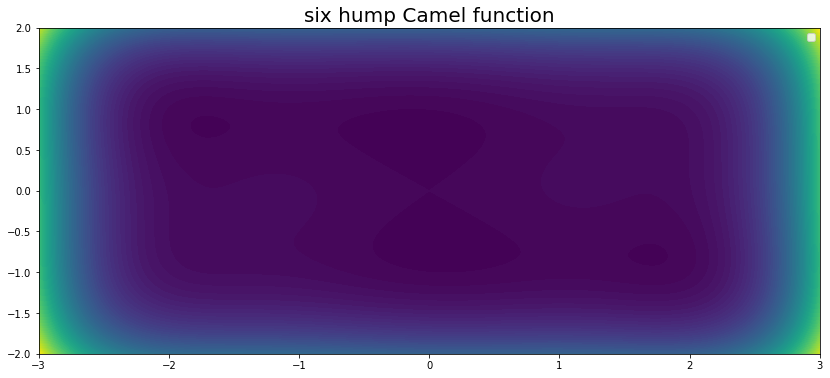

In [6]:
grid = 400
X1 = np.linspace(bounds[0]['domain'][0], bounds[0]['domain'][1], grid)
X2 = np.linspace(bounds[1]['domain'][0], bounds[1]['domain'][1], grid)
x1, x2 = np.meshgrid(X1, X2)
X = np.hstack((x1.reshape(grid*grid,1),x2.reshape(grid*grid,1)))

plt.figure(figsize=(14,6))
plt.plot()
plt.contourf(X1, X2, six_hump_camel_function(X).reshape(grid,grid),100, alpha=1,origin ='lower')
plt.legend()
plt.title('six hump Camel function',size=20)
plt.show()

(160000, 2)


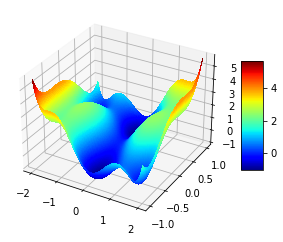

In [22]:
grid = 400
X1 = np.linspace(-2, 2, grid)
X2 = np.linspace(-1, 1, grid)
x1, x2 = np.meshgrid(X1, X2)
X = np.hstack((x1.reshape(grid*grid,1),x2.reshape(grid*grid,1)))

print(X.shape)
fig = plt.figure()
ax = fig.gca(projection='3d')
surface = ax.plot_surface(x1,x2, six_hump_camel_function(X).reshape(grid,grid), cmap=cm.jet, rstride=1, cstride=1, linewidth=0, antialiased=False, label='six hump Camel function')
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()

In [6]:
initial_design = GPyOpt.experiment_design.initial_design('random', feasible_region, 10)

In [13]:
# --- CHOOSE the objective
objective = GPyOpt.core.task.SingleObjective(six_hump_camel_function)

# --- CHOOSE the model type
model = Aleatoric_NN()
#model = GPyOpt.models.RFModel()

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

# --- CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [14]:
opt = GPyOpt.methods.ModularBayesianOptimization(model, feasible_region, objective, acquisition, evaluator, initial_design)

In [15]:
opt.run_optimization(max_iter)

Models printout after each iteration is only available for GP and GP_MCMC models
Epoch 1/10
1/1 [==============================] - 1s 548ms/step - loss: 1.6853
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 1.6521
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 1.6215
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.5937
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 1.5689
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1.5467
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1.5270
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.5102
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.4964
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 1.4849


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
opt

In [ ]:
bo.plot_acquisition()
bo.plot_convergence()